#Task 1

Implement nonlinear Transformation functions:
<ol>
<li> Log Transformation </li>
<li> Power-law Transformation </li>
</ol>

In [1]:
import  numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
def log_transform(gray_image):
  #implement this function
  img_array = np.asarray(gray_image)
  img_array = np.asarray(gray_image)
  log_image = np.zeros_like(img_array, dtype=np.float64)
  for i in range(img_array.shape[0]):
      for j in range(img_array.shape[1]):
           log_image[i,j]=np.log(img_array[i,j]+1)

  log_image = log_image / np.max(log_image)
  log_image = (log_image * 255).astype(np.uint8)

  return log_image

def power_transform(gray_image, gamma):
   #implement this function
    img_array = np.asarray(gray_image)
    img_normalized = img_array / 255.0
    power_image = np.power(img_normalized, gamma)
    power_image = (power_image * 255).astype(np.uint8)

    return power_image


**Log Transform:**  in log transform we use s=c *log(1+r) formula. Where we add 1 inorder to avoiding error while r=0.And c is working as a scaling factor .In code instead of c we just normalized the array and then multiply each element with (L-1) =255 as it's an 8-bit color depth image.

**Power Transformation:** Here I first normalized the image intensity values within [0,1] range.Then applied power-law (transformation) s= c*r^ℾ .C is agian a sacling factor to make the range within 0 to 255.so c=255 here.And finally we convert it to integer by rounding off.

# Task 1: Output and Analysis
Use your previously implemented functions to show the outputs of log transform and power transform on a sample image. Provide your analysis on the following topics:
<ol>
<li> Which function is suitable for which type of images? </li>

<li> Why is intensity scaling required before display? </li>
</ol>

##**1.Ans: **##
If an image contains most of the part with low intensity values that is balck  but white or high intensity values are within a short band.In this scenario we can use log transformation to get a larger contrast in the white color.So the detailing could be visible.So if an image contains more dark region and less white or bright region then log transform should be used.

In case of power law it is used to darken more region or getting more shades of of color.It is used in different machines inorder to have more pictoral vsibility .It enlarge the intensity range in an image.

##**2Ans:**##
Logarithmic and power transforms are non-linear and can compress or stretch pixel intensities non-uniformly. Without scaling, this could result in some regions being clipped (values too high or too low) and others poorly displayed. Scaling ensures the entire dynamic range is visible.
Here we normalized the values and covert then into [0,1] range and again multiply with 255 to scale into particular range[0,255]
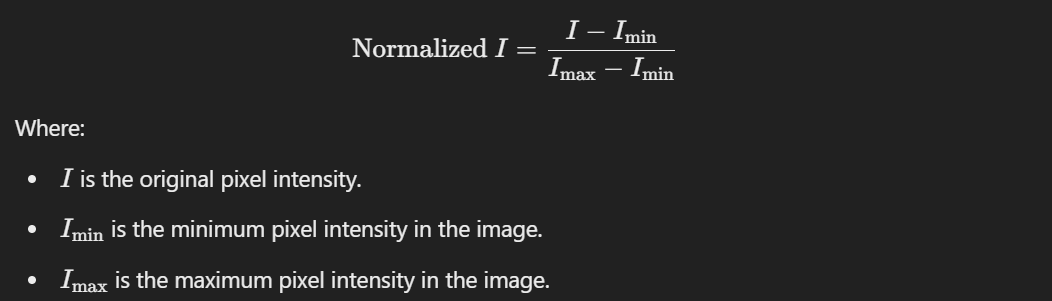


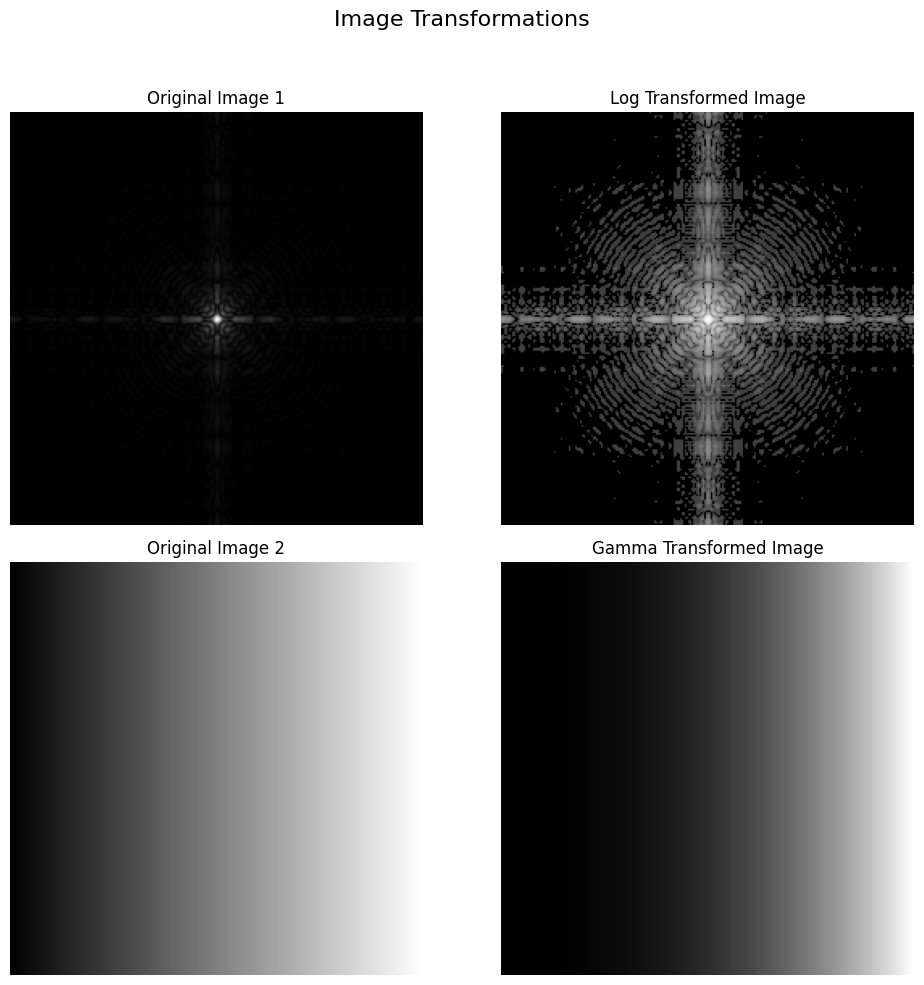

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

img = Image.open('/content/sample_data/Image/Log.tif')
img_array = np.asarray(img)
axs[0, 0].imshow(img_array, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image 1')

logimg_array = log_transform(img_array)
axs[0, 1].imshow(logimg_array, cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('Log Transformed Image')

img2 = Image.open('/content/sample_data/Image/gamma.tif')
img2_array = np.asarray(img2)
axs[1, 0].imshow(img2_array, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('Original Image 2')

gamma_image = power_transform(img2_array, 2.5)
axs[1, 1].imshow(gamma_image, cmap='gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('Gamma Transformed Image')

fig.suptitle('Image Transformations', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Task 2
Implement Global Histogram Equalization on gray-scale images

In [4]:
def my_histogram(gray_image):
  #implement this function
  img_array = np.asarray(gray_image)

  histogram= [0] *256
  flattened_img = img_array.flatten()
  for pixel_value in flattened_img:
        histogram[pixel_value] += 1

  return histogram

This function return histogram for any grayscale image

In [21]:
def global_HistEqual(gray_image):
    histogram = my_histogram(gray_image)
    cdf = np.cumsum(histogram)
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = np.round(cdf_normalized).astype(np.uint8)
    global_equalized_image = cdf_normalized[gray_image]

    return global_equalized_image


##Explanation##
The `global_HistEqual` function enhances the contrast of a grayscale image using global histogram equalization. It computes the image's histogram to get the frequency of pixel intensities. Then, it calculates the cumulative distribution function (CDF) to map pixel intensities based on their cumulative frequencies. The CDF is normalized to a scale of 0 to 255, ensuring the pixel values span the full intensity range. Finally, the original image's pixel intensities are replaced using this normalized CDF, resulting in a more evenly distributed contrast across the image.

# Task 2: Output and Analysis
Use your previously implemented function to show the output of global histogram equalization on a sample image. Provide your analysis on the following topic:
<ol>
<li> Why repeated application of Histogram Equalization doesn't produce any further improvements on output images? </li>
</ol>

###***Ans : ***##
Repeated application of histogram equalization doesn't improve output images because the process redistributes pixel intensities to achieve a near-uniform distribution after the first application. Once the intensities are evenly spread across the available range, applying the equalization again doesn’t enhance the image further since the contrast is already maximized.

Additionally, histogram equalization is an **idempotent operation**—applying it multiple times yields the same result, as the pixel values remain unchanged after the initial transformation. No new information is introduced into the image, and the pixel intensities have already been optimized for contrast.

In fact, reapplying the process can even degrade the image by introducing artifacts or reducing detail, since each equalization modifies the intensity distribution. Thus, repeating the operation is redundant and unnecessary.

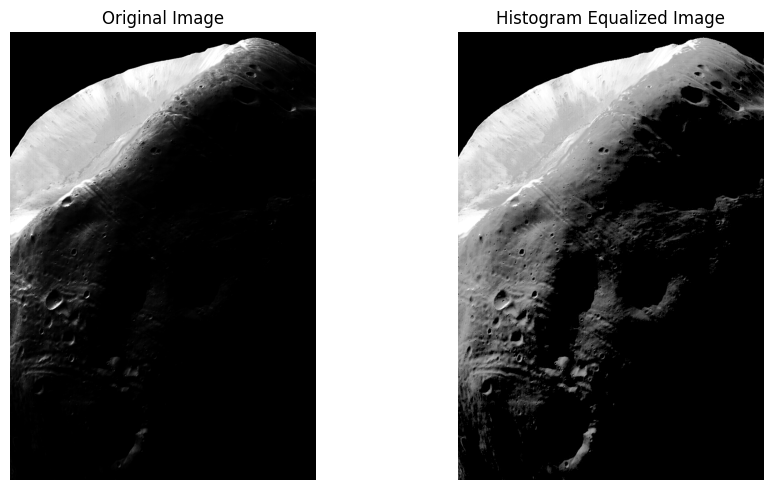

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
img = Image.open('/content/sample_data/Image/histogram.tif')
img_array = np.asarray(img)
axs[0].imshow(img_array, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')

# Histogram Equalized Image
histEq_img_array = global_HistEqual(img_array)
axs[1].imshow(histEq_img_array, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Histogram Equalized Image')

plt.tight_layout()
plt.show()


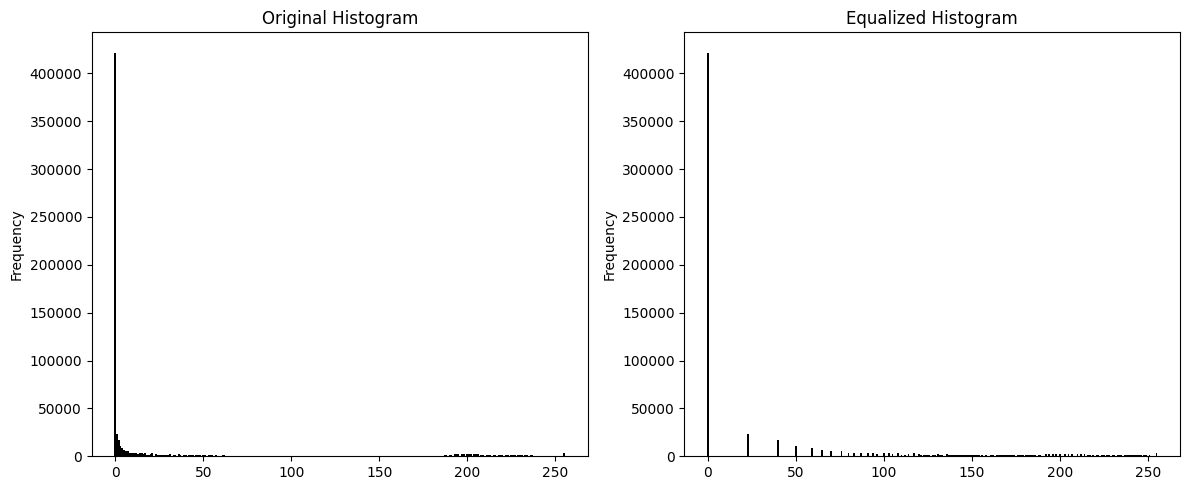

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Histogram
histogram = my_histogram(img_array)
axs[0].bar(range(256), histogram, width=1.0, color='black')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Original Histogram')

# Equalized Histogram
eq_histogram = my_histogram(global_HistEqual(img_array))
axs[1].bar(range(256), eq_histogram, width=1.0, color='black')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()


As per the 2 histograms , equalized one is more distributed and contrast is increased.


# Task 3

Implement Local Histogram Equalization (LHE) on gray scale images.


In [24]:
def local_HistEqual(gray_image, stride):
    img_array = np.asarray(gray_image)
    height, width = img_array.shape
    local_equalized_image = np.zeros_like(img_array)

    for i in range(0, height, stride):
        for j in range(0, width, stride):
            window = img_array[i:i+stride, j:j+stride]
            histogram = [0] * 256
            flattened_window = window.flatten()
            for pixel_value in flattened_window:
                histogram[pixel_value] += 1

            cdf = np.cumsum(histogram)
            cdf_normalized = cdf * 255 / cdf[-1]
            cdf_normalized = np.round(cdf_normalized).astype(np.uint8)
            equalized_window = cdf_normalized[window]
            local_equalized_image[i:i+stride, j:j+stride] = equalized_window

    return local_equalized_image


##Explanation :##
The implementation in the `local_HistEqual` function uses **non-overlapping windows**.Because the loops that iterate over the image process regions in steps of `stride` in both the height (`i`) and width (`j`) directions, without revisiting any pixel within a previously processed window.

### Explanation:
- The loops increment by `stride` at each step (`for i in range(0, height, stride)` and `for j in range(0, width, stride)`), meaning that once a window of size `stride × stride` is processed, the next window starts at the next `stride` value.
- If the windows were overlapping, the loop indices would move by smaller steps (e.g., `i+1` or `i+stride//2`), causing partial overlap between adjacent windows. But here, every window processes a distinct, non-overlapping section of the image.



# Task 3: Output and Analysis
Use your previously implemented function to show the output of local histogram equalization on a sample image. Provide your analysis on the following topic:
<ol>
<li> Why do you have annoying side effects at the boundary of local image regions? </li>
<li> What is the effect of changing the stride? </li>
</ol>

###1.Ans:###
 In local histogram equalization, each region of the image is processed independently, leading to inconsistencies at the boundaries between adjacent regions. These artifacts occur because:

Discontinuities in Pixel Intensity: Adjacent regions might have different intensity mappings, causing abrupt changes in pixel intensity at the boundaries. Since each region is equalized independently, the transformation in one region doesn't align smoothly with the neighboring one, resulting in visible seams or blocky artifacts.

Loss of Context: The equalization process in one local region doesn’t consider the neighboring regions, which leads to local contrast enhancements that can differ drastically from adjacent areas. The lack of smoothing across the region boundaries causes unnatural transitions.

###2Ans: ###
The stride defines the size of the local regions used for histogram equalization, and changing the stride affects:

**Smaller Stride (e.g., stride=2):**
Finer Local Contrast: Smaller regions result in finer local adjustments, enhancing details more effectively.
More Artifacts: Smaller regions increase the chances of discontinuities between regions, creating more noticeable artifacts or "blocky" effects at the boundaries.
**Larger Stride (e.g., stride=16):**
Smoother Transitions: Larger regions reduce boundary artifacts, as more pixels are grouped together and the equalization is applied to a broader area, leading to smoother intensity transitions.
Reduced Local Contrast: Larger strides result in fewer regions and reduce the effectiveness of local contrast enhancement, making it more similar to global histogram equalization. Fine details may be less enhanced.

Here I used stride=4 a good trade-off between sharpening and smoothing.

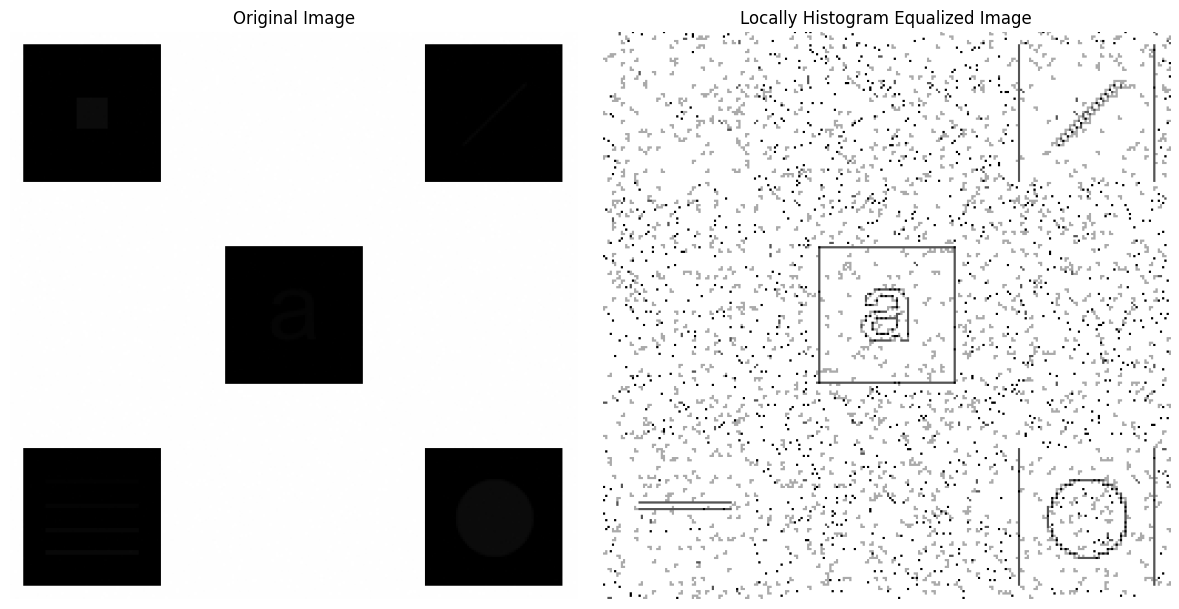

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
img = Image.open('/content/sample_data/Image/local_hist.tif')
img_array = np.asarray(img)
axs[0].imshow(img_array, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')

# Locally Histogram Equalized Image
histEq_img_array = local_HistEqual(img_array, stride=4)
axs[1].imshow(histEq_img_array, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Locally Histogram Equalized Image')

plt.tight_layout()
plt.show()


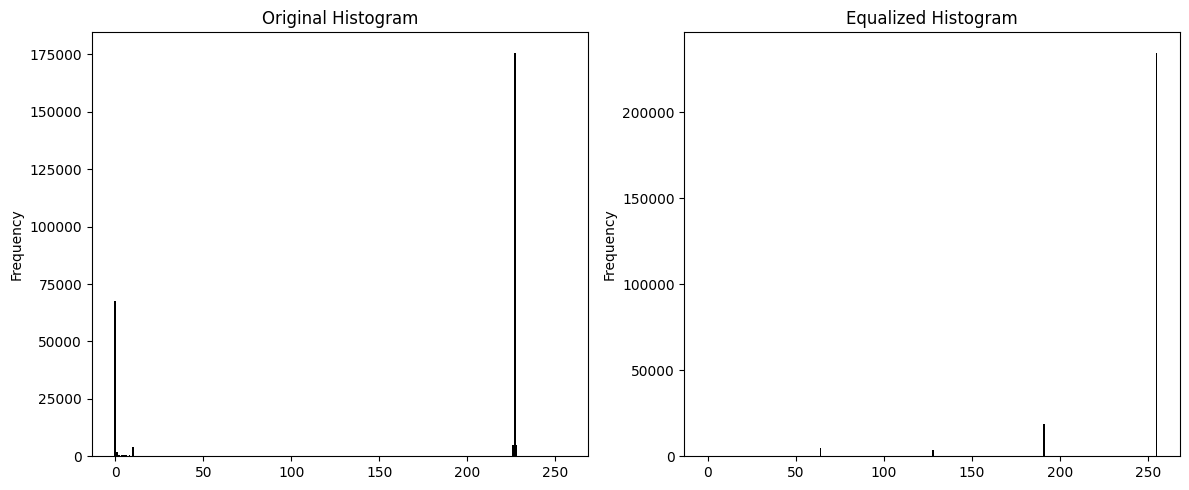

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Histogram
histogram = my_histogram(img_array)
axs[0].bar(range(256), histogram, width=1.0, color='black')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Original Histogram')

# Locally Histogram Equalized Histogram
eq_histogram = my_histogram(local_HistEqual(img_array, stride=4))
axs[1].bar(range(256), eq_histogram, width=1.0, color='black')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()
